In [33]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [34]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [35]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [9]:
# reflect an existing database into a new model
Base = automap_base()

Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [10]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [21]:
for column in Station.__table__.columns:
    print(column.name, column.type)

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [22]:
for column in Measurement.__table__.columns:
    print(column.name, column.type)

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Precipitation Analysis

In [ ]:
# get the most recent entry date

session.query()

Most recent date: 2017-08-23


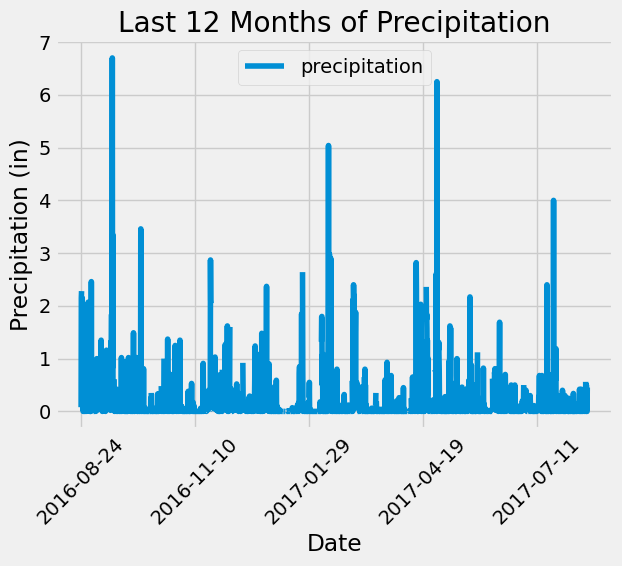

In [41]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


from datetime import timedelta


most_recent_date = session.query(func.max(Measurement.date)).scalar()
print("Most recent date:", most_recent_date)

most_recent_date_dt = dt.datetime.strptime(most_recent_date, "%Y-%m-%d")

# Calculate the date one year from the last date in data set.
prev_year = most_recent_date_dt - timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precip_data = (session.query(Measurement.date, Measurement.prcp)
               .filter(Measurement.date >= prev_year)
               .order_by(Measurement.date)
               .all())

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.DataFrame(precip_data, columns=['date', 'precipitation'])

# Sort the dataframe by date
precip_df = precip_df.sort_values(by='date')

# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(x='date', y='precipitation', rot=90)
plt.title('Last 12 Months of Precipitation')
plt.xlabel('Date')
plt.ylabel('Precipitation (in)')
plt.xticks(rotation=45)
plt.show()

In [44]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [45]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).scalar()
print("Total number of stations:", total_stations)

Total number of stations: 9


In [46]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = (session.query(Measurement.station, func.count(Measurement.id))
                   .group_by(Measurement.station)
                   .order_by(func.count(Measurement.id).desc())
                   .all())

In [48]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = active_stations[0][0] 

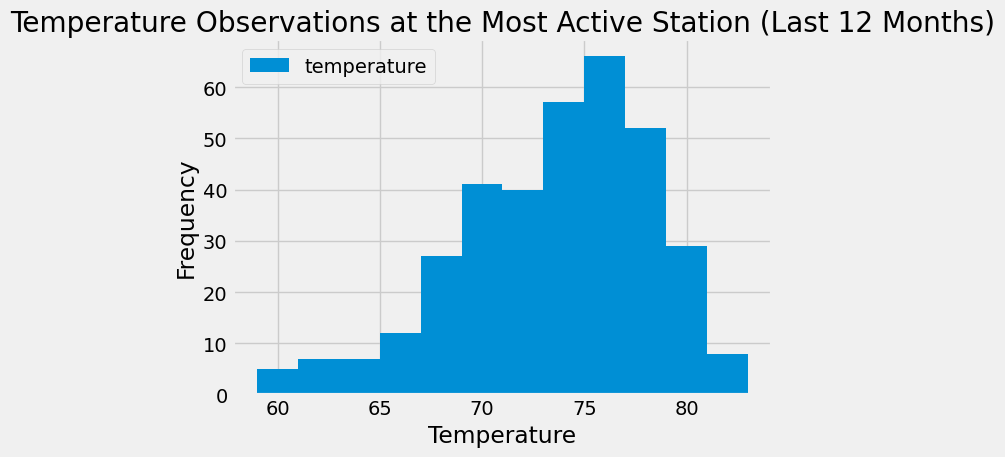

In [51]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_stats = (session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs))
              .filter(Measurement.station == most_active_station)
              .all())

tobs_data = (session.query(Measurement.tobs)
             .filter(Measurement.station == most_active_station)
             .filter(Measurement.date >= prev_year)
             .all())


# Convert to DataFrame
tobs_df = pd.DataFrame(tobs_data, columns=['temperature'])

# Plot as a histogram
tobs_df.plot(kind='hist', bins=12, title="Temperature Observations at the Most Active Station (Last 12 Months)")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Close Session

In [16]:
# Close Session
session.close()